In [4]:
import requests
import pprint

host = "http://ec2-35-163-71-211.us-west-2.compute.amazonaws.com:8083"

request = "{}/capabilities".format(host)

pprint.pprint(requests.get(request).json())

[{'description': 'Lists the current capabilities of this Nexus system',
  'name': 'Capabilities',
  'parameters': {},
  'path': '/capabilities'},
 {'description': 'Computes a correlation map between two datasets given an '
                 'arbitrary geographical area and time range',
  'name': 'Correlation Map',
  'parameters': {'ds': {'description': 'One or more comma-separated dataset '
                                       'shortnames',
                        'name': 'Dataset',
                        'type': 'string'},
                 'endTime': {'description': 'Ending time in milliseconds since '
                                            'midnight Jan. 1st, 1970 UTC',
                             'name': 'End Time',
                             'type': 'long integer'},
                 'lowPassFilter': {'description': 'Specifies whether to apply '
                                                  'a low pass filter on the '
                                                  '

http://ec2-35-163-71-211.us-west-2.compute.amazonaws.com:8083/timeAvgMapSpark?ds=AVHRR_OI_L4_GHRSST_NCEI&startTime=1451606400&endTime=1483142400&minLon=-170.0&minLat=-5.0&maxLon=-120.0&maxLat=5.0&spark=local,16,32


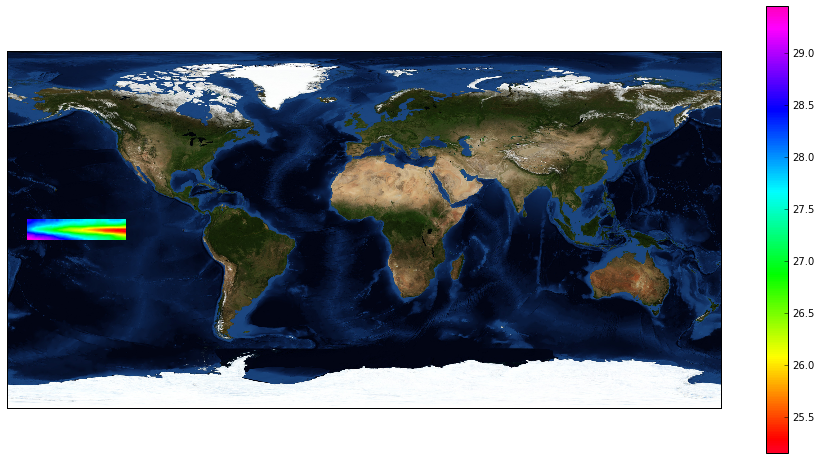

In [5]:
import requests
import json
import datetime
import time
import numpy
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from shapely.geometry import box
from mpl_toolkits.basemap import Basemap

epoch = datetime.datetime.utcfromtimestamp(0)

# Build the HTTP request
host = "http://ec2-35-163-71-211.us-west-2.compute.amazonaws.com:8083"

ds='AVHRR_OI_L4_GHRSST_NCEI'
bbox = box(-170, -5, -120, 5) #minx, miny, maxx, maxy
date_format = '%Y-%m-%dT%H:%M:%SZ'
startTime = int((datetime.datetime(2016,1,1) - epoch).total_seconds())
endTime = int((datetime.datetime(2016,12,31) - epoch).total_seconds())
request = "{}/timeAvgMapSpark?ds={}&startTime={}&endTime={}" \
            "&minLon={}&minLat={}&maxLon={}&maxLat={}&spark=local,16,32" \
    .format(host, ds, startTime, endTime, *bbox.bounds)
print (request)

# Send request to server
response = requests.get(request).json()

# Parse the response and create an image
lons = [point['lon'] for point in response['data'][0]]
lats = [a_list[0]['lat'] for a_list in response['data']]

my_list = numpy.ndarray((len(lats), len(lons)))
for x in range(0, len(lats)):
    for y in range(0, len(lons)):
        my_list[x][y] = response['data'][x][y]['avg']

fig, ax1 = plt.subplots(figsize=(16,8), dpi=100)
im = ax1.pcolormesh(lons, lats, my_list, vmin=my_list.min(),vmax=my_list.max(), cmap='gist_rainbow')
fig.colorbar(im, ax=ax1)

map = Basemap()
map.bluemarble(scale=0.5)